<a href="https://colab.research.google.com/github/mayurandhare13/DS_Intro_2/blob/master/Linear_Algebra_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [1]:
!pip install xlrd
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

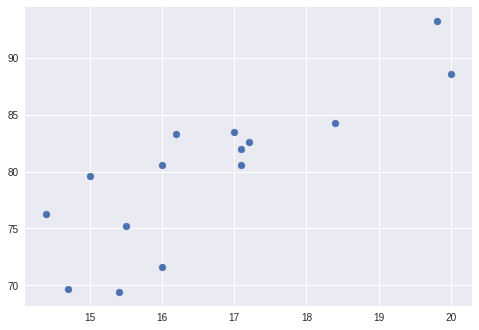

In [2]:
from matplotlib import pyplot as plt

plt.scatter(df.chirps_per_sec, df.temperature, marker = 'o')
plt.show()

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [4]:
import numpy as np
df['ones'] = np.ones(15)
df.head()

,chirps_per_sec,temperature,ones
0,20.000000,88.599998,1.0
1,16.000000,71.599998,1.0
2,19.799999,93.300003,1.0
3,18.400000,84.300003,1.0
4,17.100000,80.599998,1.0


## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [5]:
X = df[['ones', 'temperature']].as_matrix()
print(X)

[[ 1.         88.59999847]
 [ 1.         71.59999847]
 [ 1.         93.30000305]
 [ 1.         84.30000305]
 [ 1.         80.59999847]
 [ 1.         75.19999695]
 [ 1.         69.69999695]
 [ 1.         82.        ]
 [ 1.         69.40000153]
 [ 1.         83.30000305]
 [ 1.         79.59999847]
 [ 1.         82.59999847]
 [ 1.         80.59999847]
 [ 1.         83.5       ]
 [ 1.         76.30000305]]


## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [23]:
Y = df['chirps_per_sec'].as_matrix().reshape(-1, 1)
print(Y)

[[20.        ]
 [16.        ]
 [19.79999924]
 [18.39999962]
 [17.10000038]
 [15.5       ]
 [14.69999981]
 [17.10000038]
 [15.39999962]
 [16.20000076]
 [15.        ]
 [17.20000076]
 [16.        ]
 [17.        ]
 [14.39999962]]


## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [10]:
X_transpose = np.transpose(X)
print(X_transpose)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
  69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
  80.59999847 83.5        76.30000305]]


## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [0]:
X_transpose_X = np.matmul(X_transpose, X)

## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [0]:
inverse = np.linalg.inv(X_transpose_X)

## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [15]:
identity_mat = np.matmul(X_transpose_X, inverse)
print(identity_mat)

[[1.00000000e+00 6.01565053e-17]
 [3.50588784e-13 1.00000000e+00]]


## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [0]:
X_transpose_Y = np.matmul(np.transpose(X), Y)

## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [22]:
beta = np.matmul(inverse, X_transpose_Y)
print(beta)

[[-0.3091419 ]
 [ 0.21192498]]


In [19]:
beta_0 = beta[0,0]
beta_1 = beta[1,0]

print(beta_0)
print(beta_1)

-0.3091418981798597
0.2119249783368211


## 3) Graph the line of best fit through the scatterplot of the data points

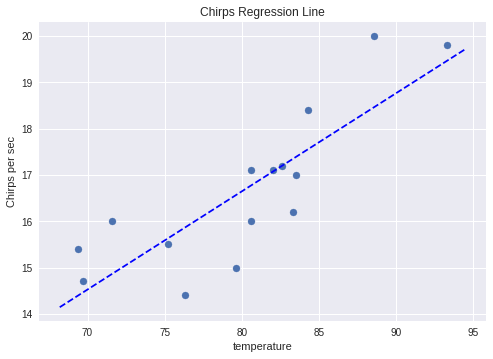

In [28]:
plt.scatter(df.temperature, df.chirps_per_sec, marker = 'o')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '--', color='b')
plt.title('Chirps Regression Line')
plt.xlabel('temperature')
plt.ylabel('Chirps per sec')
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

In [25]:
y_vals = beta_0 + beta_1 * 19
print(y_vals)

3.7174326902197414


##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [45]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data)
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
     X1  X2   X3
0   132  52  173
1   143  59  184
2   153  67  194
3   162  73  211
4   154  64  196
5   168  74  220
6   137  54  188
7   149  61  188
8   159  65  207
9   128  46  167
10  166  72  217


(11, 3)

In [0]:
s_data['Ones'] = np.ones(11)

In [0]:
X = s_data[['Ones', 'X2', 'X3']].as_matrix()
Y = s_data['X1'].as_matrix().reshape(-1, 1)

In [48]:
beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))
print(beta)

[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


In [50]:
beta_0 = beta[0,0]
beta_1 = beta[1,0]
beta_2 = beta[2, 0]

print(beta_0)
print(beta_1)
print(beta_2)

30.99410295233247
0.8614146864683789
0.33485919716576973


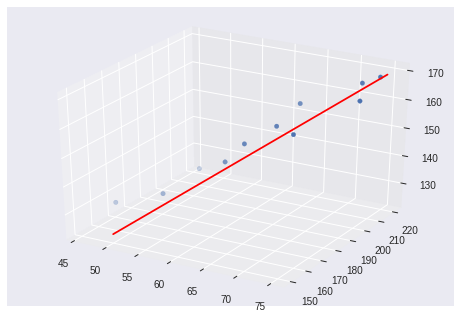

In [63]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = np.linspace(50, 75, 100)
yline = np.linspace(150, 220, 100)
zline = beta_0 + beta_1 * xline + beta_2 * yline 
ax.plot3D(xline, yline, zline, 'red')

# Data for three-dimensional scattered points
ax.scatter3D(s_data.X2, s_data.X3, s_data.X1, cmap='Blues');